In [204]:
import sys
sys.path.append('/home/greg/GitHub/')
import sawyer.io as sio
import numpy as np
import pandas as pd
import sawyer.dtools as too
import matplotlib.pyplot as plt
import os

import importlib
importlib.reload(too)

<module 'sawyer.dtools' from '/home/greg/GitHub/sawyer/dtools.py'>

In [205]:
dpath = '/home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/'

In [206]:
co2_1 = os.path.join(dpath, 'EDGE_Black_CR1000_1_co2.dat')
co2_1 = sio.load_toa5(co2_1, skiprows=[200320,])
co2_2 = os.path.join(dpath, 'EDGE_Black_CR1000_2_co2.dat')
co2_2 = sio.load_toa5(co2_2, skiprows=[199549,])
# pd.to_datetime(co2_2.index) - find datetime that can't be converted
# np.where(co2_2.index=='2019-02-14 17:2019-02-18 05:45:00"') - best to just look in file

Parsing /home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/EDGE_Black_CR1000_1_co2.dat
Parsing /home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/EDGE_Black_CR1000_2_co2.dat


In [207]:
co2 = co2_1.join(co2_2, how='outer',rsuffix='_2')
#co2.columns
co2conf = too.var_h_v_dict2(co2.columns, 'CO2', horiz=0, vert=4, maxsplit=4)
co2conf

{'P19ESR': ['5_Avg', '10_Avg', '20_Avg'],
 'P20DRT': ['5_Avg', '10_Avg', '20_Avg'],
 'P22ESR': ['5_Avg', '10_Avg', '20_Avg'],
 'P13DRT': ['5_Avg', '10_Avg', '20_Avg'],
 'P25DRT': ['5_Avg', '10_Avg', '20_Avg'],
 'P16ESR': ['5_Avg', '10_Avg', '20_Avg'],
 'P23CON': ['5_Avg', '10_Avg', '20_Avg'],
 'P18CON': ['5_Avg', '10_Avg', '20_Avg', 'AG25_Avg'],
 'P17CON': ['5_Avg', '10_Avg', '20_Avg', 'AG25_Avg']}

In [208]:
vwc_1 = os.path.join(dpath, 'EDGE_Black_CR1000_1_vwc.dat')
vwc_1 = sio.load_toa5(vwc_1, skiprows=[200322,])
vwc_2 = os.path.join(dpath, 'EDGE_Black_CR1000_2_vwc.dat')
vwc_2 = sio.load_toa5(vwc_2, skiprows=[199549,])

Parsing /home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/EDGE_Black_CR1000_1_vwc.dat
Parsing /home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/EDGE_Black_CR1000_2_vwc.dat


In [209]:
vwc = vwc_1.join(vwc_2, how='outer',rsuffix='_2')
#vwc.columns
# select only columns at same plots as CO2
vwc = vwc.loc[:,[c for c in vwc.columns if c.split('_')[0] in co2conf.keys() and '90' not in c]]
vwcconf = too.var_h_v_dict2(vwc.columns, 'VWC', horiz=0, vert=4, maxsplit=4)
vwcconf

{'P19ESR': ['45_Avg'],
 'P20DRT': ['45_Avg'],
 'P22ESR': ['45_Avg'],
 'P13DRT': ['45_Avg'],
 'P25DRT': ['45_Avg'],
 'P16ESR': ['45_Avg'],
 'P23CON': ['45_Avg'],
 'P18CON': ['45_Avg'],
 'P17CON': ['45_Avg']}

In [210]:
# pd.to_datetime(ts_1.index) - find datetime that can't be converted
# np.where(ts_1.index=='2019-02-14 17:2019-02-18 05:45:00"') - best to just look in file
ts_1 = os.path.join(dpath, 'EDGE_Black_CR1000_1_temp.dat')
ts_1 = sio.load_toa5(ts_1, skiprows=[200327,])
# pd.to_datetime(ts_1.index) - find datetime that can't be converted
# np.where(ts_1.index=='2019-02-14 17:2019-02-18 05:45:00"') - best to just look in file

ts_2 = os.path.join(dpath, 'EDGE_Black_CR1000_2_temp.dat')
ts_2 = sio.load_toa5(ts_2, skiprows=[199546,])

Parsing /home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/EDGE_Black_CR1000_1_temp.dat
Parsing /home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/EDGE_Black_CR1000_2_temp.dat


In [211]:
ts = ts_1.join(ts_2, how='outer',rsuffix='_2')
#ts.columns
tsconfig1 = too.var_h_v_dict2(ts.columns, 'SOILTEMP', horiz=0, vert=4, maxsplit=4)
tsconfig1

{'P19ESR': ['5_Avg', '10_Avg'],
 'P20DRT': ['5_Avg', '10_Avg'],
 'P22ESR': ['5_Avg', '10_Avg'],
 'P13DRT': ['5_Avg', '10_Avg'],
 'P25DRT': ['5_Avg', '10_Avg'],
 'P16ESR': ['5_Avg', '10_Avg'],
 'P23CON': ['5_Avg', '10_Avg'],
 'P18CON': ['5_Avg', '10_Avg'],
 'P17CON': ['5_Avg', '10_Avg']}

In [212]:
# Met split across 2 files
met_1 = os.path.join(dpath, 'EDGE_Black_CR1000_1_met.dat')
met_1 = sio.load_toa5(met_1, skiprows=[195878])
met_2 = os.path.join(dpath, 'EDGE_Black_CR1000_2_met.dat')
met_2 = sio.load_toa5(met_2, skiprows=[195878])

Parsing /home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/EDGE_Black_CR1000_1_met.dat
Parsing /home/greg/GD_gregmaurer/Sev Soil Respiration Data/EDGE_Black_SoilSensorDat/EDGE_Black_CR1000_2_met.dat


In [213]:
met = met_1.join(met_2, how='outer',rsuffix='_2')
met.columns

Index(['RECORD', 'P18CON_B6_D1M1_AT_Avg', 'P19ESR_B6_D1M1_AT_Avg',
       'P20DRT_B6_D1M1_AT_Avg', 'P18CON_B6_D1M1_RH', 'P19ESR_B6_D1M1_RH',
       'P20DRT_B6_D1M1_RH', 'RECORD_2', 'batt_Avg', 'bPressure_Avg',
       'precip_Tot'],
      dtype='object')

In [214]:
import matplotlib.pyplot as plt

## Plot the profile data

### 3 Control CO2 profiles

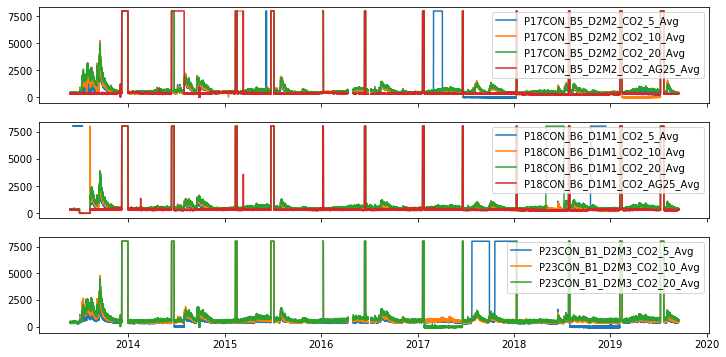

In [215]:
conco2 = [c for c in co2.columns if 'CON' in c]
p17=[c for c in conco2 if 'P17' in c]
p18=[c for c in conco2 if 'P18' in c]
p23=[c for c in conco2 if 'P23' in c]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(12,6))
ax[0].plot(co2.index, co2.loc[:, p17])
ax[0].legend(p17)
ax[1].plot(co2.index, co2.loc[:, p18])
ax[1].legend(p18)
ax[2].plot(co2.index, co2.loc[:, p23])
ax[2].legend(p23)

### ESR treatment CO2 profiles (late monsoon?)

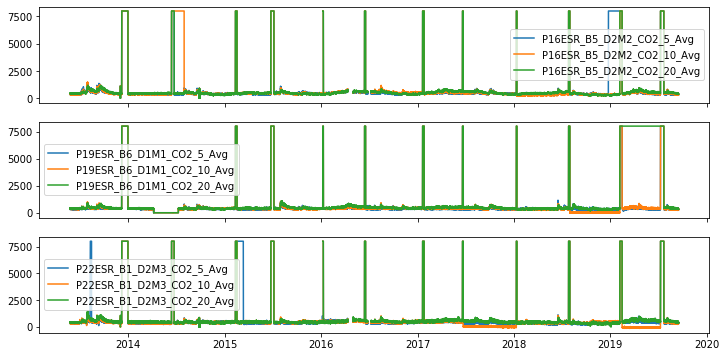

In [216]:
esrco2 = [c for c in co2.columns if 'ESR' in c]
p16=[c for c in esrco2 if 'P16' in c]
p19=[c for c in esrco2 if 'P19' in c]
p22=[c for c in esrco2 if 'P22' in c]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(12,6))
ax[0].plot(co2.index, co2.loc[:, p16])
ax[0].legend(p16)
ax[1].plot(co2.index, co2.loc[:, p19])
ax[1].legend(p19)
ax[2].plot(co2.index, co2.loc[:, p22])
ax[2].legend(p22)

### Drought treatment CO2 profiles

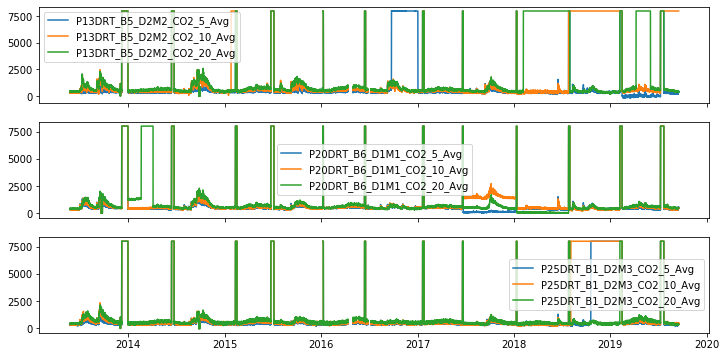

In [217]:
drtco2 = [c for c in co2.columns if 'DRT' in c]
p13=[c for c in drtco2 if 'P13' in c]
p20=[c for c in drtco2 if 'P20' in c]
p25=[c for c in drtco2 if 'P25' in c]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(12,6))
ax[0].plot(co2.index, co2.loc[:, p13])
ax[0].legend(p13)
ax[1].plot(co2.index, co2.loc[:, p20])
ax[1].legend(p20)
ax[2].plot(co2.index, co2.loc[:, p25])
ax[2].legend(p25)

## Soil Water Content

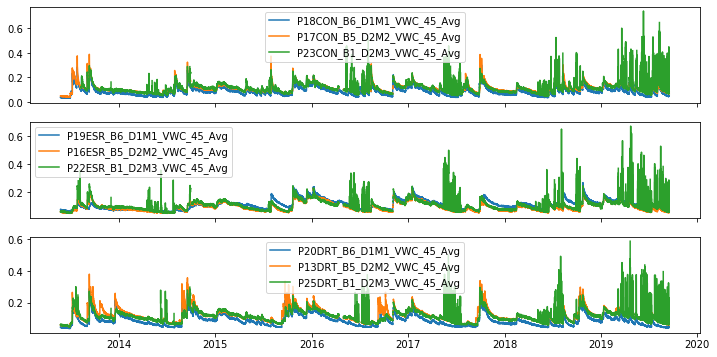

In [218]:
convwc = [c for c in vwc.columns if 'CON' in c]
esrvwc = [c for c in vwc.columns if 'ESR' in c]
drtvwc = [c for c in vwc.columns if 'DRT' in c]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(12,6))
ax[0].plot(vwc.index, vwc.loc[:,convwc])
ax[0].legend(convwc)
ax[1].plot(vwc.index, vwc.loc[:,esrvwc])
ax[1].legend(esrvwc)
ax[2].plot(vwc.index, vwc.loc[:,drtvwc])
ax[2].legend(drtvwc)

## Soil temperature

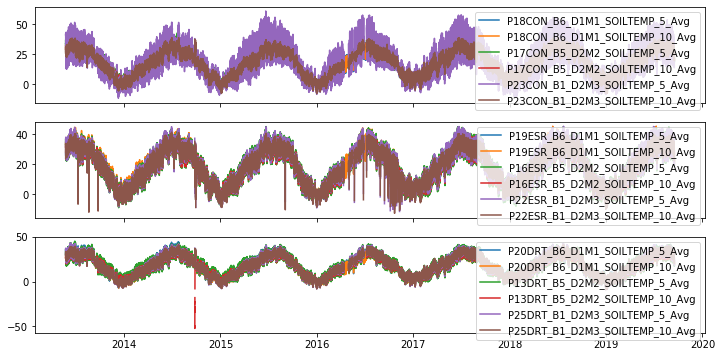

In [219]:
conts = [c for c in ts.columns if 'CON' in c and 'SOILTEMP' in c]
esrts = [c for c in ts.columns if 'ESR' in c and 'SOILTEMP' in c]
drtts = [c for c in ts.columns if 'DRT' in c and 'SOILTEMP' in c]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(12,6))
ax[0].plot(ts.index, ts.loc[:,conts])
ax[0].legend(conts)
ax[1].plot(ts.index, ts.loc[:,esrts])
ax[1].legend(esrts)
ax[2].plot(ts.index, ts.loc[:,drtts])
ax[2].legend(drtts)